<a href="https://colab.research.google.com/github/astrophysicsvivien/TaylorFlow/blob/master/Pycbc_speedtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install lalsuite pycbc

In [0]:
import pycbc.noise
import pycbc.psd
import pycbc.filter
import pycbc.waveform
import matplotlib.pyplot as plt
import numpy as np
import time

In [0]:
m1 = 1.4
m2 = 1.4
f_high = 250
df = 1./512

# Generate some noise with an advanced ligo psd
flow = 10.
delta_f = 1./256
flen = int(2048 / delta_f) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
psd_flat = pycbc.psd.flat_unity(flen, delta_f, flow)

# # Generate 16 seconds of noise at 4096 Hz
# delta_t = 1.0 / 1024
# tsamples = int(16/ delta_t)
# strain = pycbc.noise.noise_from_psd(tsamples, delta_t, psd, seed=120)
# stilde = strain.to_frequencyseries()
# stilde = stilde

# Use a waveform as a matched filter
waveform1, hc1 = pycbc.waveform.get_fd_waveform(approximant="TaylorF2",
                             mass1=m1, mass2=m2,
                             f_lower=flow, delta_f=psd_flat.delta_f)

n_waveform1 = waveform1/max(waveform1)

In [0]:
tc_low = -1.
tc_high = 1.
t_c = np.linspace(tc_low,tc_high,200)
norm_condition = 1/max(waveform1)
freq_tc = np.outer(t_c,n_waveform1.sample_frequencies)
shift_factor = np.exp(1j*(2*np.pi*freq_tc))*norm_condition

48.2816960811615


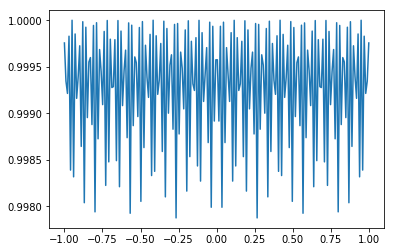

In [0]:
match_max = np.zeros(len(t_c))
pycbc_start = time.time()
for coa_time in range(len(t_c)):
    waveform_shift = shift_factor[coa_time,:]
    waveform_shifted = waveform_shift*waveform1
    match_max[coa_time],ind = pycbc.filter.match(n_waveform1, waveform_shifted, psd=psd_flat, low_frequency_cutoff=flow)
pycbc_end = time.time()
        
print(pycbc_end-pycbc_start)
plt.plot(t_c,match_max)

In [0]:
speeds_python = np.zeros(10)
for speed in range(len(speeds_python)):
    match_max = np.zeros(len(t_c))
    python_start = time.time()
    for coa_time in range(len(t_c)):
        waveform_shift = shift_factor[coa_time,:]
        waveform_shifted = waveform_shift*waveform1
        match_max[coa_time],ind = pycbc.filter.match(n_waveform1, waveform_shifted, psd=psd_flat, low_frequency_cutoff=flow)
    
    python_end = time.time()
    speeds_python[speed] = python_end-python_start

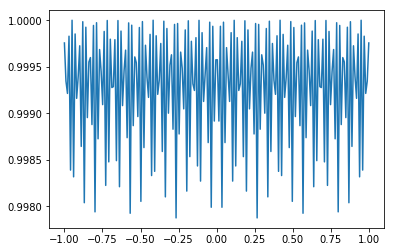

In [0]:
plt.plot(t_c,match_max)

Text(0, 0.5, 'Time (s)')

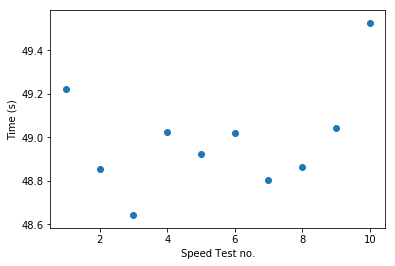

In [0]:
plot_length = len(speeds_python)
plt.scatter(np.linspace(1,plot_length,plot_length)[:],speeds_python[:])
plt.xlabel('Speed Test no.')
plt.ylabel('Time (s)')